In [1]:
!pip install -q tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 47.2MB/s 
     |████████████████████████████████| 3.9MB 40.9MB/s 
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Make the dataset
N = 100
X = np.random.random((N, 2)) * 6-3 # uniformly distributed betwen(-3, +3)
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

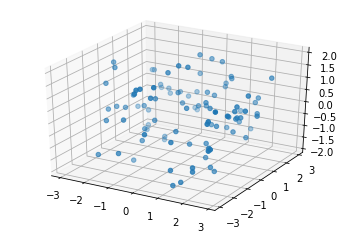

In [5]:
# plot it

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [0]:
# Build the model
model = tf.keras.models.Sequential([
                                    
                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                    tf.keras.layers.Dense(1)
])

In [7]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.1)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 3ms/sample - loss: 4.1725
Epoch 2/100
100/100 [==============================] - 0s 90us/sample - loss: 1.1783
Epoch 3/100
100/100 [==============================] - 0s 98us/sample - loss: 1.6994
Epoch 4/100
100/100 [==============================] - 0s 84us/sample - loss: 1.1688
Epoch 5/100
100/100 [==============================] - 0s 95us/sample - loss: 1.2846
Epoch 6/100
100/100 [==============================] - 0s 90us/sample - loss: 1.2480
Epoch 7/100
100/100 [==============================] - 0s 88us/sample - loss: 1.0372
Epoch 8/100
100/100 [==============================] - 0s 93us/sample - loss: 0.9796
Epoch 9/100
100/100 [==============================] - 0s 93us/sample - loss: 1.1737
Epoch 10/100
100/100 [==============================] - 0s 95us/sample - loss: 0.8543
Epoch 11/100
100/100 [==============================] - 0s 90us/sample - loss: 0.9295
Epoch 12/100
100/100 [=====================

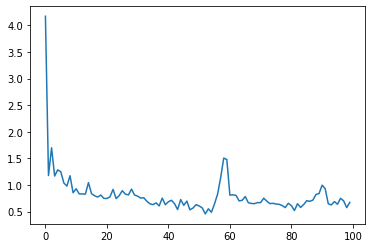

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

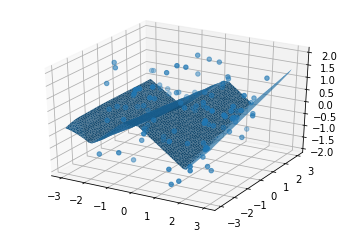

In [11]:
# Plot the prediction surface
fig  = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax. scatter(X[:, 0], X[:, 1], Y)


# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)

Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

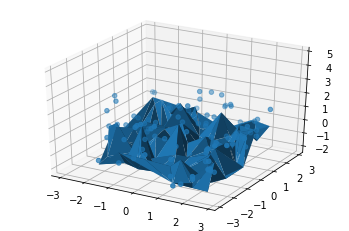

In [12]:
# Can it extrpolate?
# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(X[:, 0], X[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()